### Masive Data Lab Activities

Description : Read and Cleaning Data
File        : bitcoin_cash_price.csv 
Name        : Yudi Aditya

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### Bitcoin Cash Price

#### 1. Reading Data

In [2]:
# Read Bitcoin Cash Price
df1 = pd.read_csv('../data/raw/cryptocurrencypricehistory/bitcoin_cash_price.csv', parse_dates = ['Date'])
df1.head()

,Date,Open,High,Low,Close,Volume,Market Cap
0,2017-09-05,514.90,550.95,458.78,541.71,"338,978,000","8,527,100,000"
1,2017-09-04,608.26,608.26,500.75,517.24,"328,957,000","10,072,200,000"
2,2017-09-03,578.27,617.41,563.59,607.43,"344,862,000","9,574,520,000"
3,2017-09-02,621.96,642.05,560.58,575.90,"350,478,000","10,297,000,000"
4,2017-09-01,588.40,645.52,586.73,622.17,"393,839,000","9,740,460,000"


In [3]:
type(df1.Date[0])

pandas._libs.tslibs.timestamps.Timestamp

In [4]:
# Set Date as it's index
df1.set_index('Date', inplace = True )

In [5]:
# Get General Information regarding data frame
df1.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 45 entries, 2017-09-05 to 2017-07-23
Data columns (total 6 columns):
Open          45 non-null float64
High          45 non-null float64
Low           45 non-null float64
Close         45 non-null float64
Volume        45 non-null object
Market Cap    45 non-null object
dtypes: float64(4), object(2)
memory usage: 2.5+ KB


- The data frame has 45 entries and 7 columns. 
- All columns has 45 elements, probably there's no missing data. Especially for Open, high, Low and Close. To make it sure, We'll see for this
- Volume and Close's data type are object, it should be number.  

After checking using open refine, i found missing data in Market Cap, but it use "-". df.info() method recognize it as a string. We have to replace it as a NaN

In [6]:
# Replace missing data as NaN
df1.replace('-', np.nan,inplace=True)
df1[df1['Market Cap'].isnull()].head()

,Open,High,Low,Close,Volume,Market Cap
Date,,,,,,
2017-08-01,294.60,426.11,210.38,380.01,"65,988,800",NaN
2017-07-31,346.36,347.82,266.19,294.46,"1,075,960",NaN
2017-07-30,385.14,385.14,316.25,345.66,"606,695",NaN
2017-07-29,410.56,423.73,323.73,384.77,"737,815",NaN
2017-07-28,386.65,465.18,217.06,406.05,"1,230,160",NaN


In [7]:
# Count missing data in each column
df1.isnull().sum()

Open           0
High           0
Low            0
Close          0
Volume         0
Market Cap    10
dtype: int64

#### 2. Cleaning Data Part 1 (Deal with Wrong Format)

Problem : 
1. Data in some columns ('Volume' and 'Market Cap') written in different format. Python recognize it as string not    a number. 
2. There are missing data in 'Market Cap' column 

Solution : 
1. Convert all string data to float
2. 'Market cap' calculated by multiplying share outstanding by market price. Therefore, I'm going to use interpolation method to fill the missing data in Market Cap.     

In [8]:
print('Volume Data Type :', type(df1.Volume[0]))
print('Market Cap Data Type :', type(df1['Market Cap'][0]))

Volume Data Type : <class 'str'>
Market Cap Data Type : <class 'str'>


Volume and Market Cap written wrong format. We should delete coma in each string. Because "8,527,100,000" make python recognize it as a string.

In [9]:
#convert data to number
def convert_to_number(x):
    try:
        return int(x.replace(',',''))
    except:
        return x

df1.Volume = df1.Volume.apply(convert_to_number)
df1['Market Cap'] = df1['Market Cap'].apply(convert_to_number)

df1.describe()

,Open,High,Low,Close,Volume,Market Cap
count,45.000000,45.000000,45.000000,45.000000,4.500000e+01,3.500000e+01
mean,461.323333,528.302889,412.777556,459.134667,4.196584e+08,7.883221e+09
std,155.461942,181.817928,151.387218,154.506075,6.792123e+08,2.815761e+09
min,212.180000,223.700000,200.980000,213.150000,8.501300e+04,3.497290e+09
25%,321.350000,373.870000,293.100000,319.690000,1.076060e+08,5.123560e+09
50%,417.100000,541.660000,364.050000,413.060000,2.162730e+08,8.527100e+09
75%,596.190000,645.520000,570.270000,599.630000,3.938390e+08,1.027590e+10
max,772.420000,1091.970000,683.940000,754.560000,3.196230e+09,1.274260e+10


In [10]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 45 entries, 2017-09-05 to 2017-07-23
Data columns (total 6 columns):
Open          45 non-null float64
High          45 non-null float64
Low           45 non-null float64
Close         45 non-null float64
Volume        45 non-null int64
Market Cap    35 non-null float64
dtypes: float64(5), int64(1)
memory usage: 3.7 KB


In [11]:
df1[df1['Market Cap'].isnull()].head()

,Open,High,Low,Close,Volume,Market Cap
Date,,,,,,
2017-08-01,294.60,426.11,210.38,380.01,65988800,NaN
2017-07-31,346.36,347.82,266.19,294.46,1075960,NaN
2017-07-30,385.14,385.14,316.25,345.66,606695,NaN
2017-07-29,410.56,423.73,323.73,384.77,737815,NaN
2017-07-28,386.65,465.18,217.06,406.05,1230160,NaN


#### 3. Cleaning Data 2 (Deal with Missing Data)

In [12]:
#new_df is the data with non NaN value
new_df = df1[np.isfinite(df1['Market Cap'])]
new_df.tail()

,Open,High,Low,Close,Volume,Market Cap
Date,,,,,,
2017-08-06,212.18,223.70,203.44,220.66,107606000,3.497290e+09
2017-08-05,231.11,273.04,200.98,213.15,144043000,3.809330e+09
2017-08-04,362.18,386.93,233.05,233.05,185038000,5.969720e+09
2017-08-03,448.49,519.28,364.05,364.05,161518000,7.392030e+09
2017-08-02,382.38,756.93,309.33,452.66,416207000,6.302360e+09


In [13]:
# Lets see the correlation between each column
correlation = new_df.corr(method="pearson")
correlation

,Open,High,Low,Close,Volume,Market Cap
Open,1.000000,0.866955,0.974537,0.910747,0.375433,0.999990
High,0.866955,1.000000,0.841476,0.925035,0.688101,0.865942
Low,0.974537,0.841476,1.000000,0.944290,0.367466,0.974910
Close,0.910747,0.925035,0.944290,1.000000,0.578738,0.910789
Volume,0.375433,0.688101,0.367466,0.578738,1.000000,0.373185
Market Cap,0.999990,0.865942,0.974910,0.910789,0.373185,1.000000


In the data frame above, we can inferred that Market Cap has a strong relationship (Linear) with Open.

Let's plot data between Market Cap and other variable, then see the relation between the data

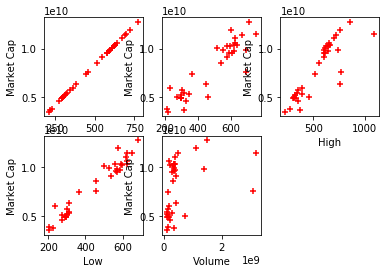

In [14]:
import matplotlib.pyplot as plt
def plot_data(xdata,ydata,xlabel):
    plt.scatter(xdata,ydata,marker='+',color='red')
    plt.ylabel('Market Cap')
    plt.xlabel(xlabel)
        
plt.subplot(2,3,1)
plot_data(new_df.Open, new_df['Market Cap'],'Open')
plt.subplot(2,3,2)
plot_data(new_df.Close, new_df['Market Cap'],'Close')
plt.subplot(2,3,3)
plot_data(new_df.High, new_df['Market Cap'],'High')
plt.subplot(2,3,4)
plot_data(new_df.Low, new_df['Market Cap'],'Low')
plt.subplot(2,3,5)
plot_data(new_df.Volume, new_df['Market Cap'],'Volume')

The figures above show that Open and Market Cap has the best relationship (Linear relationship).

In [15]:
from sklearn import linear_model

model       = linear_model.LinearRegression()
Open        = new_df[['Open']]
Market_Cap  = new_df['Market Cap']

In [16]:
# train data using linear regression 
model.fit(Open, Market_Cap)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [17]:
# Model Score
model.score(Open, Market_Cap)

0.9999801609861945

In [18]:
# Fill Missing Data Using linear model prediction 
# and Assign it to new column
open = df1[['Open']]
market_cap_predict = model.predict(open) 
df1['Market Cap Predict'] = market_cap_predict.astype('int64')
df1[df1['Market Cap'].isnull()].head()

,Open,High,Low,Close,Volume,Market Cap,Market Cap Predict
Date,,,,,,,
2017-08-01,294.60,426.11,210.38,380.01,65988800,NaN,4859285818
2017-07-31,346.36,347.82,266.19,294.46,1075960,NaN,5716421715
2017-07-30,385.14,385.14,316.25,345.66,606695,NaN,6358611246
2017-07-29,410.56,423.73,323.73,384.77,737815,NaN,6779561681
2017-07-28,386.65,465.18,217.06,406.05,1230160,NaN,6383616563


#### 4. Data Visualization

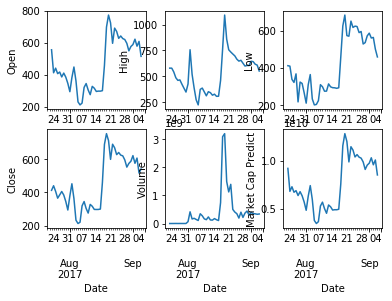

In [19]:
%matplotlib inline
    
plt.subplot(2,3,1)
plt.ylabel('Open')
df1.Open.plot()

plt.subplot(2,3,2)
plt.ylabel('High')
df1.High.plot()

plt.subplot(2,3,3)
plt.ylabel('Low')
df1.Low.plot()

plt.subplot(2,3,4)
plt.ylabel('Close')
df1.Close.plot()

plt.subplot(2,3,5)
plt.ylabel('Volume')
df1.Volume.plot()

plt.subplot(2,3,6)
plt.ylabel('Market Cap Predict')
df1['Market Cap Predict'].plot()